In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [42]:
df = pd.read_csv("NFLX.csv")



In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df.tail()

In [ ]:
df = df[["Date", "Close"]]
df

In [ ]:
df.info()

### **Converting Date (Object) to Datetime**

In [43]:
import datetime

def str_to_datetime(s):
    split = s.split("-")
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

#example of spilting date time
x = str_to_datetime('2018-02-05')
x

datetime.datetime(2018, 2, 5, 0, 0)

In [44]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [45]:
df.index = df.pop('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


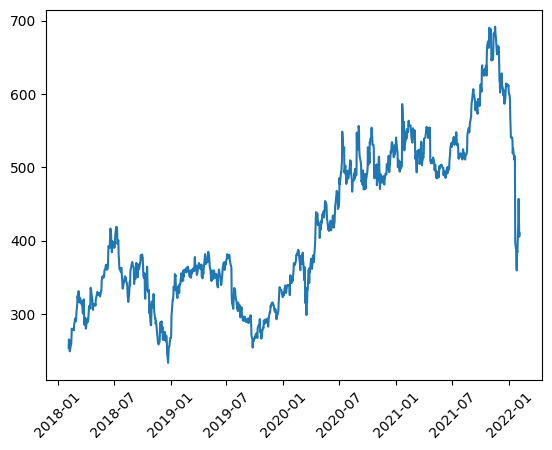

In [46]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])
plt.xticks(rotation=45)
plt.show()

In [47]:
# defining window size
def window_data(data, n=3):
    windowed_data = pd.DataFrame()
    for i in range(n, 0, -1):
        windowed_data[f'Target-{i}'] = data['Close'].shift(i)
    windowed_data['Target'] = data['Close']
    return windowed_data.dropna()

In [48]:
df = window_data(df)

In [ ]:
df.head()

,Target-3,Target-2,Target-1,Target
Date,,,,
2018-02-08,254.259995,265.720001,264.559998,250.100006
2018-02-09,265.720001,264.559998,250.100006,249.470001
2018-02-12,264.559998,250.100006,249.470001,257.950012
2018-02-13,250.100006,249.470001,257.950012,258.269989
2018-02-14,249.470001,257.950012,258.269989,266.000000


In [49]:
def windowed_df_to_date_X_y(windowed_dataframe):

    df_as_np = windowed_dataframe.to_numpy()
#    dates = df_as_np.index()

    middle_matrix = df_as_np[:, :-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -1]

    return X.astype(np.float32), Y.astype(np.float32)

dates = df.index

X, y = windowed_df_to_date_X_y(df)
dates.shape, X.shape, y.shape

((1006,), (1006, 3, 1), (1006,))

In [50]:
dates

DatetimeIndex(['2018-02-08', '2018-02-09', '2018-02-12', '2018-02-13',
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-20',
               '2018-02-21', '2018-02-22',
               ...
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [51]:
X.shape, y.shape

((1006, 3, 1), (1006,))

In [ ]:
X

In [52]:
dates = np.array(dates)

In [53]:
print(dates)
print()
print(dates.shape)

['2018-02-08T00:00:00.000000000' '2018-02-09T00:00:00.000000000'
 '2018-02-12T00:00:00.000000000' ... '2022-02-02T00:00:00.000000000'
 '2022-02-03T00:00:00.000000000' '2022-02-04T00:00:00.000000000']

(1006,)


In [54]:
# first 80% for training
# next 10% for validation
# last 10% for testing

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

# Train Data
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

# Validation Data
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# Test Data
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

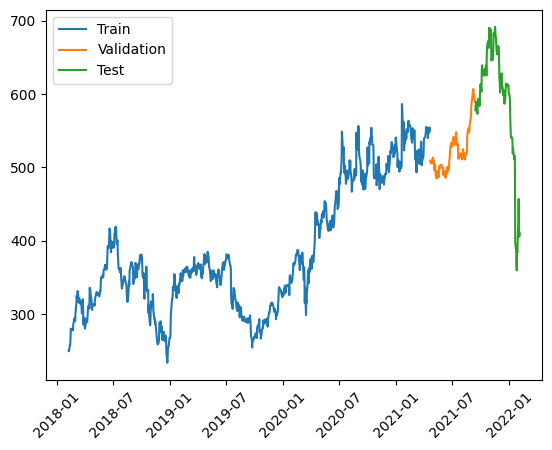

In [55]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.xticks(rotation=45)

plt.legend(['Train', 'Validation', 'Test'])
plt.show()

### **LSTM MODEL**

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(72, input_shape=(3,1)))

model.add(Dense(32,'relu'))

model.add(Dense(16,'relu'))

model.add(Dense(8,'relu'))

model.add(Dense(4,'relu'))

model.add(Dense(1,'linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 72)                21312     
                                                                 
 dense_5 (Dense)             (None, 32)                2336      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 24353 (95.13 KB)
Trainable params: 24353

In [57]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error'])

In [58]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=120)

Epoch 1/120
26/26 [==============================] - 4s 30ms/step - loss: 155160.8594 - mean_absolute_error: 384.4448 - val_loss: 271845.1562 - val_mean_absolute_error: 520.5801
Epoch 2/120
26/26 [==============================] - 0s 6ms/step - loss: 154275.1875 - mean_absolute_error: 383.2921 - val_loss: 269651.4062 - val_mean_absolute_error: 518.4688
Epoch 3/120
26/26 [==============================] - 0s 6ms/step - loss: 151079.9375 - mean_absolute_error: 379.0989 - val_loss: 261649.8750 - val_mean_absolute_error: 510.6936
Epoch 4/120
26/26 [==============================] - 0s 6ms/step - loss: 140653.1250 - mean_absolute_error: 365.0050 - val_loss: 237585.3438 - val_mean_absolute_error: 486.5633
Epoch 5/120
26/26 [==============================] - 0s 7ms/step - loss: 114401.9609 - mean_absolute_error: 326.6595 - val_loss: 184392.0625 - val_mean_absolute_error: 428.4270
Epoch 6/120
26/26 [==============================] - 0s 8ms/step - loss: 67564.7422 - mean_absolute_error: 243.206

26/26 [==============================] - 0s 2ms/step


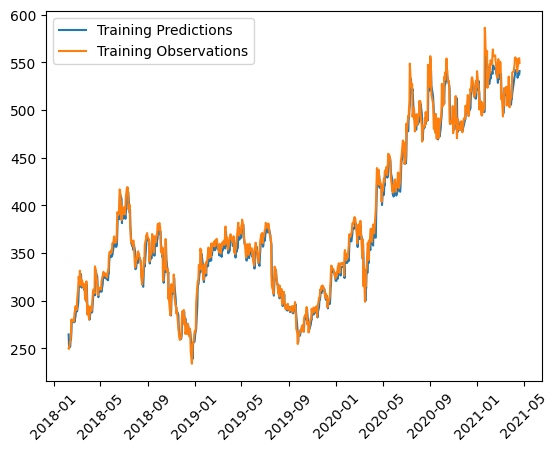

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)

plt.xticks(rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])
plt.show()

4/4 [==============================] - 0s 2ms/step


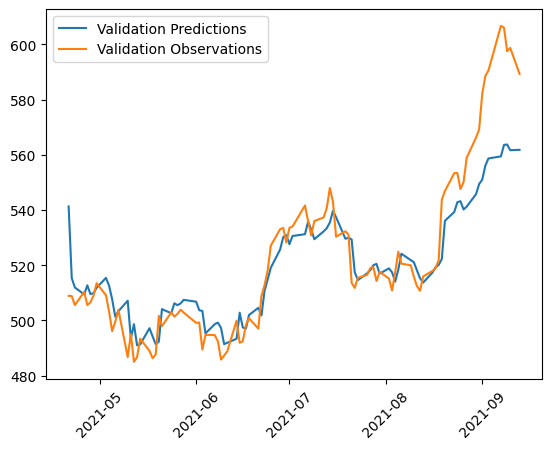

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

plt.xticks(rotation=45)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

4/4 [==============================] - 0s 2ms/step


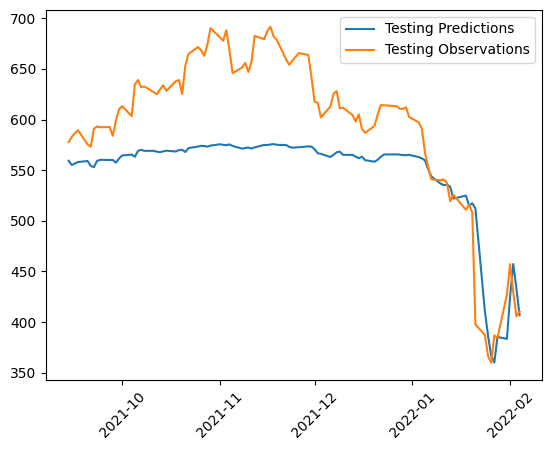

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.xticks(rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

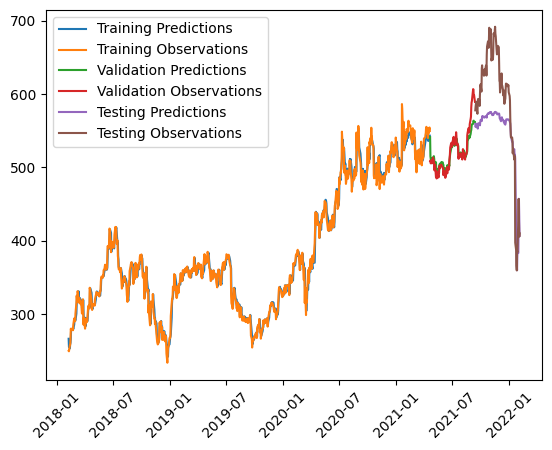

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.xticks(rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])
plt.show()

### Now we will try to predict the stock prices without the actual data, starting from the validation_data till the test_data and Evaluate the result

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

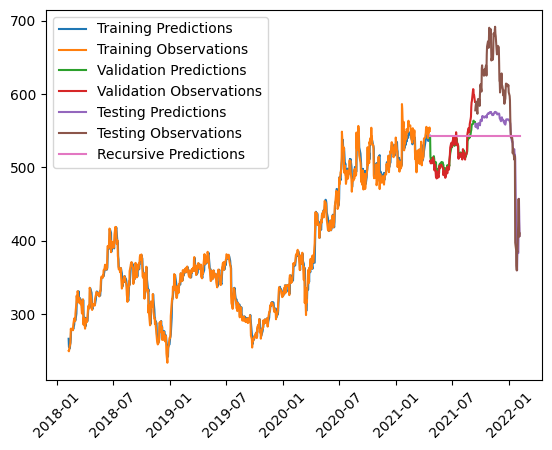

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)

plt.xticks(rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])
plt.show()

## The Pink Line indicates the prediction without any data, i.e. we are starting from the known date (last date of val_data) and trying to predict future stock prices from there with help of our LSTM Model.